In [1]:
import hyperiax
from hyperiax.tree.topology import symmetric_topology, asymmetric_topology, tree_from_newick_recursive
from hyperiax.tree import HypTree
from hyperiax.plotting import plot_tree
import jax
from jax import numpy as jnp

# Creating the Tree

First, we initialize the tree. 
This can be done by mutliple methods

``hyperiax.tree.topology.asymmetric_topology(depth)``

``hyperiax.tree.topology.symmetric_topology(h,branching)``


builds a symmetric tree, with h depth, and branching
note the tree does not include a length of the branches

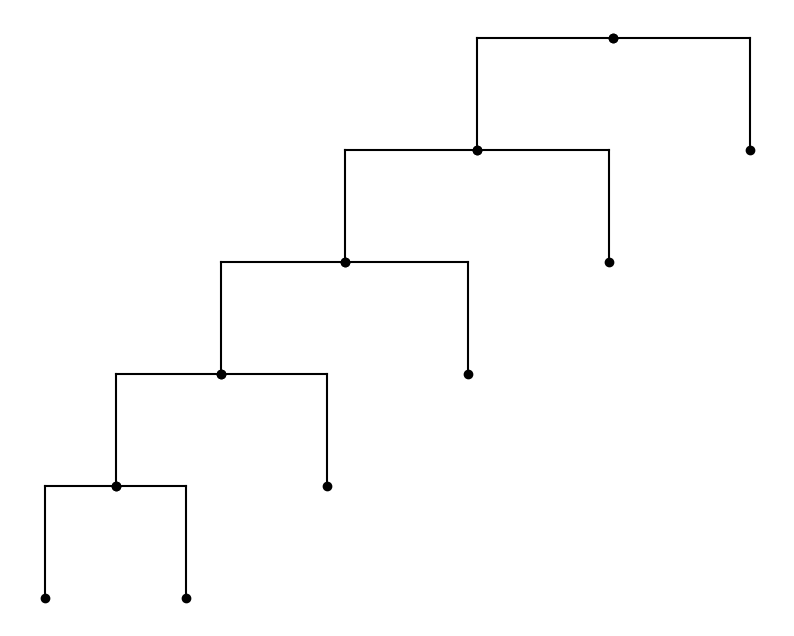

In [2]:

topology = hyperiax.tree.topology.asymmetric_topology(5)
tree = HypTree(topology)

plot_tree(tree)

## Add names 

It is also possible to add names to the tree. 

The names can be stores in the attribut "node.name"


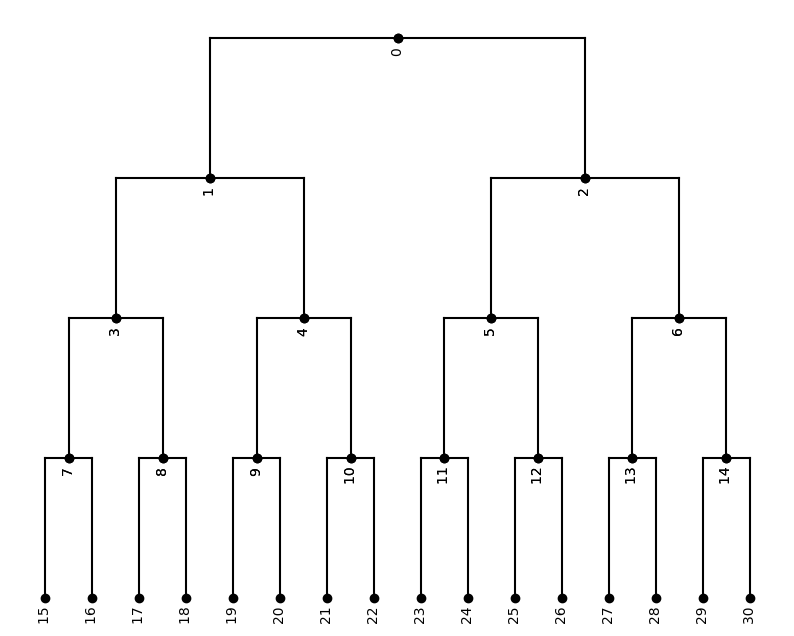

In [3]:

topology = hyperiax.tree.topology.symmetric_topology(4,2)
tree = HypTree(topology)



for i,node in enumerate(tree.iter_topology_bfs()):
    node.name = str(i)

plot_tree(tree,inc_names=True)


# Add branch length 
Lets say we now want to set the `edge_length` to be a decaying value as a function of the depth in the tree. Lets for the sake of example pick $l=exp(-ln(2)*d)$ where `d` is the depth of the node and `l` is the resulting `edge_length`. Each tree calculated the depth of each node, so we can use that here.

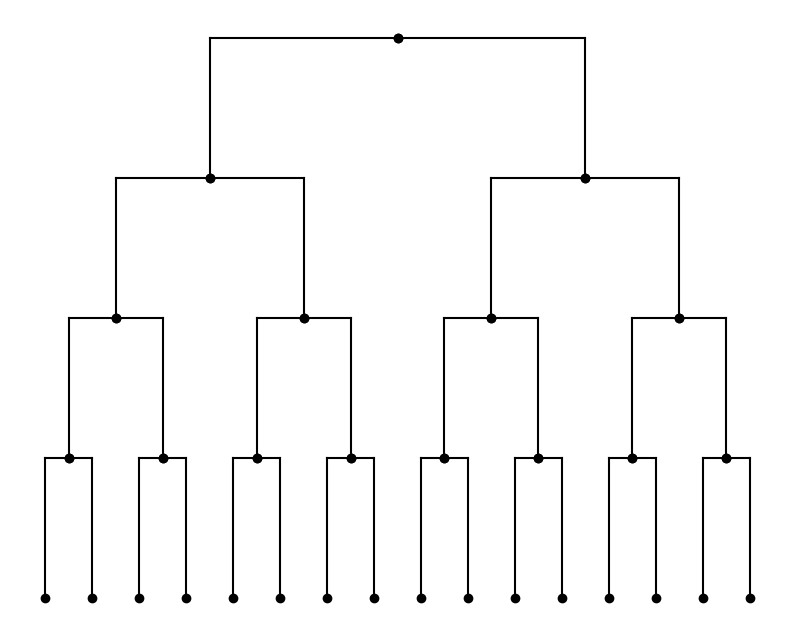

In [4]:

topology = hyperiax.tree.topology.symmetric_topology(4,2)
tree = HypTree(topology)

tree.add_property('edge_length', shape=(1,))
tree.data['edge_length'] = jnp.exp(-jnp.log(2)*tree.node_depths)

plot_tree(tree)

# Tree reader
it is also possible to read a tree from a newick file.


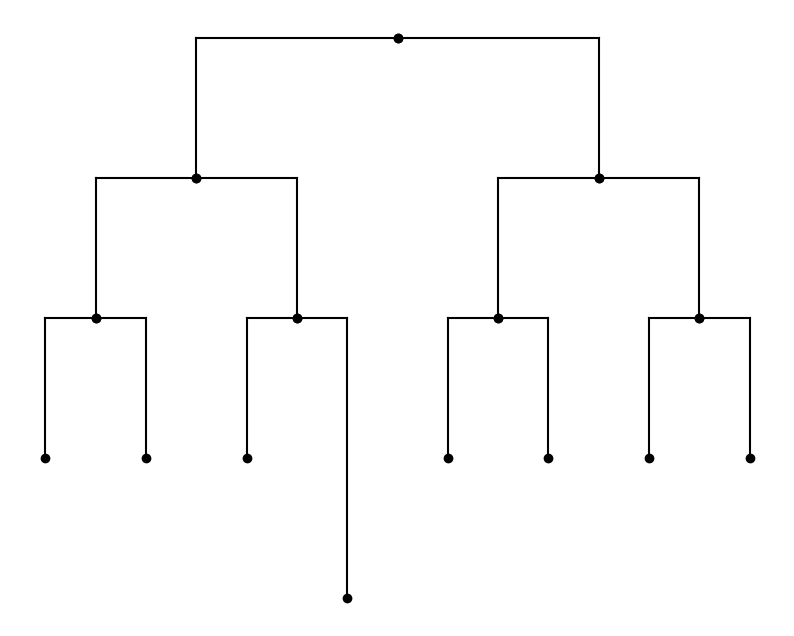

In [5]:
tree = tree_from_newick_recursive("(((:1,:1),(:1,:2)),((:1,:1),(:1,:1)));")
plot_tree(tree)


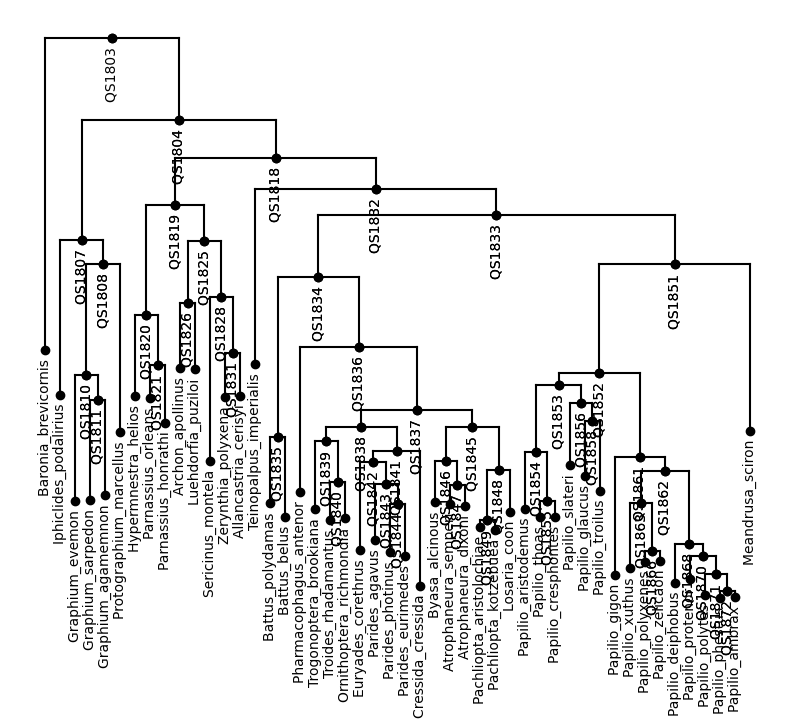

In [7]:
#Smaller subset of the tree from Kawahara 2023 (DOI: 10.1038/s41559-023-02041-9),
string_tree = "(Baronia_brevicornis:0.1711,((Iphiclides_podalirius:0.08472,((Graphium_evemon:0.06883,(Graphium_sarpedon:0.05466,Graphium_agamemnon:0.05188)QS1811:0.01369)QS1810:0.06096,Protographium_marcellus:0.09227)QS1808:0.01315)QS1807:0.0653,(((Hypermnestra_helios:0.04444,(Parnassius_orleans:0.01792,Parnassius_honrathi:0.03123)QS1821:0.0276)QS1820:0.06041,((Archon_apollinus:0.03581,Luehdorfia_puziloi:0.03646)QS1826:0.03388,(Sericinus_montela:0.08969,(Zerynthia_polyxena:0.02408,Allancastria_cerisyi:0.02345)QS1831:0.03039)QS1828:0.03093)QS1825:0.01972)QS1819:0.02572,(Teinopalpus_imperialis:0.09583,(((Battus_polydamas:0.0359,Battus_belus:0.04337)QS1835:0.08774,(Pharmacophagus_antenor:0.07956,(((Trogonoptera_brookiana:0.03698,(Troides_rhadamantus:0.02074,Ornithoptera_richmondia:0.01965)QS1840:0.02241)QS1839:0.00805,((Euryades_corethrus:0.04833,(Parides_agavus:0.03072,(Parides_photinus:0.02647,Parides_eurimedes:0.02819)QS1844:0.0108)QS1843:0.01245)QS1842:0.00564,Cressida_cressida:0.07354)QS1841:0.01338)QS1838:0.00944,((Byasa_alcinous:0.02248,(Atrophaneura_semperi:0.01043,Atrophaneura_dixoni:0.01171)QS1847:0.0129)QS1846:0.01879,((Pachliopta_aristolochiae:0.00348,Pachliopta_kotzebuea:0.00499)QS1849:0.0278,Losaria_coon:0.02297)QS1848:0.02356)QS1845:0.00935)QS1837:0.03434)QS1836:0.03812)QS1834:0.03412,((((Papilio_aristodemus:0.03095,(Papilio_thoas:0.00907,Papilio_cresphontes:0.00884)QS1855:0.02664)QS1854:0.03683,(Papilio_slateri:0.03379,(Papilio_glaucus:0.03012,Papilio_troilus:0.03835)QS1858:0.0096)QS1856:0.01012)QS1853:0.00628,(Papilio_gigon:0.06457,((Papilio_xuthus:0.03532,(Papilio_polyxenes:0.00579,Papilio_zelicaon:0.00541)QS1866:0.02599)QS1863:0.01789,(Papilio_deiphobus:0.02135,(Papilio_protenor:0.01221,(Papilio_polytes:0.01127,(Papilio_phestus:0.00377,Papilio_ambrax:0.00325)QS1872:0.00893)QS1871:0.00991)QS1870:0.007)QS1868:0.03981)QS1862:0.00747)QS1861:0.04588)QS1852:0.05955,Meandrusa_sciron:0.09096)QS1851:0.02719)QS1833:0.01405)QS1832:0.01719)QS1818:0.02038)QS1804:0.04527)QS1803:0;"
tree = tree_from_newick_recursive(string_tree)
plot_tree(tree,inc_names=True)